# Práctica 1 - 3200 Phaeton
# Simulación 3
## Origen y Evolución de los Sistemas Planetarios
## Facultad de Ciencias, UNAM, 2021-1

Una simulación de la órbita de 3200 Phaeton que toma en cuenta efectos relativistas y fuerzas de radiación.

# Importación de librerias

In [1]:
import rebound                          # Para la simulación
import reboundx                         # Para añadir fuerzas adicionales
import numpy as np                      # Para almacenar información y hacer cálculos con ella
import matplotlib.pyplot as plt         # Para graficar

labels = ['Venus', '3200 Phaeton']      # Etiquietas para las gráficas

# Simulación con fuerzas adicionales

## Parámetros generales de la simulación

In [2]:
sim = rebound.Simulation()              # Comenzamos la simulación
sim.units = ('AU','yr','Msun')          # Asignamos unidades: UA (distancia), años (tiempo), masas solares (masa)

rebound.G = 39.478                      # Colocamos la constante de gravitación en unidades de UA^3*año^-2*M_sun^-1

## Añadimos los objetos

In [3]:
sim.add('Sun')
sim.add('Mercury')
sim.add('Venus')
sim.add('1983 TB')                     # 3200 Phaeton
sim.add('Earth')
sim.add('Mars')
sim.add('Jupiter')
sim.add('Saturn')
sim.add('Uranus')
sim.add('Neptune')

Searching NASA Horizons for 'Sun'... Found: Sun (10).
Searching NASA Horizons for 'Mercury'... Found: Mercury Barycenter (199).
Searching NASA Horizons for 'Venus'... Found: Venus Barycenter (299).
Searching NASA Horizons for '1983 TB'... Found: 3200 Phaethon (1983 TB).
Searching NASA Horizons for 'Earth'... 

/home/luiseduardo/anaconda3/lib/python3.8/site-packages/rebound/horizons.py:140: RuntimeWarning: Warning: Mass cannot be retrieved from NASA HORIZONS. Set to 0.
  warnings.warn("Warning: Mass cannot be retrieved from NASA HORIZONS. Set to 0.", RuntimeWarning)


Found: Earth-Moon Barycenter (3).
Searching NASA Horizons for 'Mars'... Found: Mars Barycenter (4).
Searching NASA Horizons for 'Jupiter'... Found: Jupiter Barycenter (5).
Searching NASA Horizons for 'Saturn'... Found: Saturn Barycenter (6).
Searching NASA Horizons for 'Uranus'... Found: Uranus Barycenter (7).
Searching NASA Horizons for 'Neptune'... Found: Neptune Barycenter (8).


### Datos de respaldo
Elementos orbitales de los planetas y de 3200 Phaeton para utilizar en caso de que haya un problema con el JPL NASA Horizons. Los ángulos están en radianes, el semieje mayor está en UA y la masa en masas solares.

In [112]:
# Sol
sim.add(m=1)
# Mercurio
sim.add(m = 1.651*10**-7, a = 0.3871, e = 0.2056, inc = 1.2226, Omega = 0.8436, omega = 1.3519, f = 4.4026)
# Venus
sim.add(m = 2.447*10**-6, a = 0.7233, e = 0.0068, inc = 0.0592, Omega = 1.3383, omega = 2.2957, f = 3.1761)
# 3200 Phaeton (1983 TB)
sim.add(a=1.27120790, e=0.88999396, inc=0.3872,Omega=4.62835651,omega=5.62029,M=0.0146186)
# Tierra
sim.add(m = 3.0027*10**-6, a = 1.0, e = 0.0167, inc = 8.7267*10**-7, Omega = -0.1965, omega = 1.7968, f = 1.7534)
# Marte
sim.add(m = 3.213*10**-7, a = 1.5237, e = 0.0934, inc = 0.0323, Omega = 0.8653, omega = 5.8650, f = 6.2038)
# Júpiter
sim.add(m = 9.5459*10**-4, a = 5.2034, e = 0.0484, inc = 0.0228, Omega = 1.7550, omega = 0.2575, f = 0.6005)
# Saturno
sim.add(m = 2.857*10**-4, a = 9.5371, e = 0.0542, inc = 0.04336, Omega = 1.9847, omega = 1.6132, f = 0.8717)
# Urano
sim.add(m = 4.365*10**-5, a = 19.1913, e = 0.0472, inc = 0.01344, Omega = 1.2956, omega = 2.9839, f = 5.4669)
# Neptuno
sim.add(m = 5.149*10**-5, a = 30.0690, e = 0.00858, inc = 0.0309, Omega = 2.2990, omega = 0.7849, f = 5.3212)

## Más parámetros de la simulación

In [4]:
# Le índicamos a rebound que vamos a añadir fuerzas adicionales
rebx = reboundx.Extras(sim)
# Fuerzas de radiación
rf = rebx.load_force("radiation_forces")
# Correcciones relativistas
gr = rebx.load_force("gr")
# Añadimos las fuerzas adicionales
rebx.add_force(rf)
rebx.add_force(gr)
# Colocamos la velocidad de la luz en UA/año
rf.params["c"] = 63197.8
gr.params["c"] = 63197.8

In [5]:
#Integrador
sim.integrator = 'ias15'     # Quremos precisión
# Nos movemos al centro de masa
sim.move_to_com()            

## Haciendo la simulación

In [6]:
# Número de salidas
Nout = 1000
# Tiempo que durará la simulación (años)
tmax = 50
# Número de objetos (Planetas+3200 Phaeton)
Nplanets = 9

# Arrays para guardar las coordenadas x,y,z y los elementos orbitales
x_rbx = np.zeros((Nplanets,Nout))
y_rbx = np.zeros((Nplanets,Nout))
z_rbx = np.zeros((Nplanets,Nout))
a_rbx = np.zeros((Nplanets,Nout))
ecc_rbx = np.zeros((Nplanets,Nout))
inc_rbx = np.zeros((Nplanets,Nout))
longitude_rbx = np.zeros((Nplanets,Nout))
Omega_rbx = np.zeros((Nplanets,Nout))
omega_rbx = np.zeros((Nplanets,Nout))
varpi_rbx = np.zeros((Nplanets,Nout))
n_rbx = np.zeros((Nplanets,Nout))
M_rbx = np.zeros((Nplanets,Nout))

# Array para guardar los tiempos
times = np.linspace(0.,tmax,Nout)

# Objeto con las partículas de la simulación
ps = sim.particles

# Indicamos que la fuente de radiación y del potencial gravitacional es el Sol
ps[0].params["radiation_source"] = 1
ps[0].params["gr_source"] = 1
# Le asignamos a 3200 Phaeton un parámetro beta de 0.01
sim.particles[3].beta = 0.01

# Integración
for i,time in enumerate(times):
    
    # Se integra hasta t = time
    sim.integrate(time)
    
    # Se calculan los elementos orbitales
    os = sim.calculate_orbits()
    for j in [1,2]:
        # Se almacenan los elementos orbitales
        x_rbx[j][i] = ps[j+1].x
        y_rbx[j][i] = ps[j+1].y
        z_rbx[j][i] = ps[j+1].z
        a_rbx[j][i] = os[j].a
        ecc_rbx[j][i] = os[j].e
        inc_rbx[j][i] = os[j].inc
        longitude_rbx[j][i] = os[j].l
        omega_rbx[j][i] = os[j].omega
        Omega_rbx[j][i] = os[j].Omega
        varpi_rbx[j][i] = os[j].Omega+os[j].omega
        M_rbx[j][i] = os[j].M
        n_rbx[j][i] = os[j].n

# Simulación sin fuerzas adicionales

## Parámetros generales de la simulación

In [7]:
sim = rebound.Simulation()            # Comenzamos la simulación
sim.units = ('AU','yr','Msun')        # Asignaos unidades: UA(distancia), años (tiempo) y masas solares (masa)
rebound.G = 39.478                    # Colocamos la constante de gravitación en UA^3*año^-2*M_sun^-1

## Añadimos los objetos

In [8]:
sim.add('Sun')
sim.add('Mercury')
sim.add('Venus')
sim.add('1983 TB')                     # 3200 Phaeton
sim.add('Earth')
sim.add('Mars')
sim.add('Jupiter')
sim.add('Saturn')
sim.add('Uranus')
sim.add('Neptune')

Searching NASA Horizons for 'Sun'... Found: Sun (10).
Searching NASA Horizons for 'Mercury'... Found: Mercury Barycenter (199).
Searching NASA Horizons for 'Venus'... Found: Venus Barycenter (299).
Searching NASA Horizons for '1983 TB'... Found: 3200 Phaethon (1983 TB).
Searching NASA Horizons for 'Earth'... Found: Earth-Moon Barycenter (3).
Searching NASA Horizons for 'Mars'... Found: Mars Barycenter (4).
Searching NASA Horizons for 'Jupiter'... Found: Jupiter Barycenter (5).
Searching NASA Horizons for 'Saturn'... Found: Saturn Barycenter (6).
Searching NASA Horizons for 'Uranus'... Found: Uranus Barycenter (7).
Searching NASA Horizons for 'Neptune'... Found: Neptune Barycenter (8).


### Datos de respaldo
Elementos orbitales de los planetas y de 3200 Phaeton para utilizar en caso de que haya un problema con el JPL NASA Horizons. Los ángulos están en radianes, el semieje mayor está en UA y la masa en masas solares.

In [112]:
# Sol
sim.add(m=1)
# Mercurio
sim.add(m = 1.651*10**-7, a = 0.3871, e = 0.2056, inc = 1.2226, Omega = 0.8436, omega = 1.3519, f = 4.4026)
# Venus
sim.add(m = 2.447*10**-6, a = 0.7233, e = 0.0068, inc = 0.0592, Omega = 1.3383, omega = 2.2957, f = 3.1761)
# 3200 Phaeton (1983 TB)
sim.add(a=1.27120790, e=0.88999396, inc=0.3872,Omega=4.62835651,omega=5.62029,M=0.0146186)
# Tierra
sim.add(m = 3.0027*10**-6, a = 1.0, e = 0.0167, inc = 8.7267*10**-7, Omega = -0.1965, omega = 1.7968, f = 1.7534)
# Marte
sim.add(m = 3.213*10**-7, a = 1.5237, e = 0.0934, inc = 0.0323, Omega = 0.8653, omega = 5.8650, f = 6.2038)
# Júpiter
sim.add(m = 9.5459*10**-4, a = 5.2034, e = 0.0484, inc = 0.0228, Omega = 1.7550, omega = 0.2575, f = 0.6005)
# Saturno
sim.add(m = 2.857*10**-4, a = 9.5371, e = 0.0542, inc = 0.04336, Omega = 1.9847, omega = 1.6132, f = 0.8717)
# Urano
sim.add(m = 4.365*10**-5, a = 19.1913, e = 0.0472, inc = 0.01344, Omega = 1.2956, omega = 2.9839, f = 5.4669)
# Neptuno
sim.add(m = 5.149*10**-5, a = 30.0690, e = 0.00858, inc = 0.0309, Omega = 2.2990, omega = 0.7849, f = 5.3212)

## Más parámetros de la simulación

In [9]:
# Integrador
sim.integrator = 'ias15'     # Queremos precisión
# Nos movemos al centro de masa
sim.move_to_com()            

## Haciendo la simulación

In [10]:
# Número de salidas
Nout = 1000
# Tiempo que durará la simulación (años)
tmax = 50
# Número de objetos (Planetas+3200 Phaeton)
Nplanets = 9

# Arrays para guardar las coordenadas x,y,z y los elementos orbitales
x = np.zeros((Nplanets,Nout))
y = np.zeros((Nplanets,Nout))
z = np.zeros((Nplanets,Nout))
a = np.zeros((Nplanets,Nout))
ecc = np.zeros((Nplanets,Nout))
inc = np.zeros((Nplanets,Nout))
longitude = np.zeros((Nplanets,Nout))
Omega = np.zeros((Nplanets,Nout))
omega = np.zeros((Nplanets,Nout))
varpi = np.zeros((Nplanets,Nout))
n = np.zeros((Nplanets,Nout))
M = np.zeros((Nplanets,Nout))

# Array para guardar los tiempos
times = np.linspace(0.,tmax,Nout)
# Objeto con las partículas de la simulación
ps = sim.particles

# Integración
for i,time in enumerate(times):
    
    # Se integra hasta t = time
    sim.integrate(time)
    
    # Se calculan los elementos orbitales
    os = sim.calculate_orbits()
    for j in [1,2]:
        # Se almacenan los elementos orbitales
        x[j][i] = ps[j+1].x
        y[j][i] = ps[j+1].y
        z[j][i] = ps[j+1].z
        a[j][i] = os[j].a
        ecc[j][i] = os[j].e
        inc[j][i] = os[j].inc
        longitude[j][i] = os[j].l
        omega[j][i] = os[j].omega
        Omega[j][i] = os[j].Omega
        varpi[j][i] = os[j].Omega+os[j].omega
        M[j][i] = os[j].M
        n[j][i] = os[j].n

# Gráficas

## Comparación
Se grafican los resultados de las simulaciones con y sin fuerzas adicionales. 

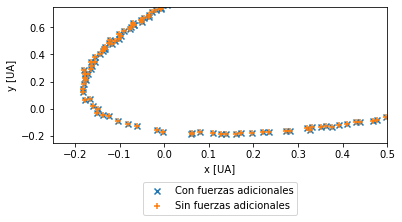

In [16]:
# Tamaño de la figura
fig = plt.figure(figsize=(6,2.5))
ax = plt.subplot(111)

# Gráficas
plt.scatter(x_rbx[2],y_rbx[2],label = 'Con fuerzas adicionales', marker='x')
plt.scatter(x[2],y[2],label = 'Sin fuerzas adicionales', marker = '+')

# Límites de los ejes
ax.set_xlim(-0.25,0.50)
ax.set_ylim(-0.25,0.75)
# Etiquetas de los ejes
ax.set_xlabel('x [UA]')
ax.set_ylabel('y [UA]')

# Leyenda fuera del gráfico
plt.legend(loc='upper center',bbox_to_anchor = (0.5,-0.25))
# Guardar la gráfica en un archivo
plt.savefig("3200Phaeton_comparacion.pdf",bbox_inches='tight');